In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
from matplotlib import cm

# Tight Binding Model for Graphene
---
$$H = - t\sum_{\langle i j\rangle}a_i^{\dagger}b_j + b_j^\dagger a_i$$
Where the $\langle \cdots \rangle$ means the nearest neighbours.
Going into the momentum space,
$$H = -t \sum_{\langle \vec r_i \vec r_j \rangle\vec k_1\vec k_2}a_{\vec k_1}^\dagger b_{\vec k_2}e^{i\vec r_i \vec k_1 - i\vec r_j \vec k_2 } + b_{\vec k_2}^\dagger a_{\vec k_1}e^{i\vec r_j \vec k_2 - i\vec r_i \vec k_1 }$$
Noting that $r_i$  and $r_j$ are the nearest neighbours, we write $\vec r_j = \vec r_i + \vec \delta_i$ . The sum then becomes,
$$
    H = -t \sum_{\vec r_i \vec \delta _i \vec k_1\vec k_2}a_{\vec k_1}^\dagger b_{\vec k_2}e^{i\vec r_i (\vec k_1 - \vec k_2 ) - i \vec \delta_i \vec k_2} + b_{\vec k_2}^\dagger a_{\vec k_1}e^{i\vec r_i (\vec k_2 - \vec k_1) +i\vec \delta_i \vec k_2 }
$$
Carrying out the sum over $\vec r_i$ we get the delta function $\delta(\vec k_1 - \vec k_2)$, using this to kill one of the momentum integration and writing the other momentum as $\vec k$ we get,
$$
    H = -t \sum_{\vec \delta _i \vec k}a_{\vec k}^\dagger b_{\vec k}e^{i\vec \delta_i \vec k} + b_{\vec k}^\dagger a_{\vec k}e^{-i\vec \delta_i \vec k}
$$

Writing this in the basis, $\psi_k = (a_k \; b_k)^T$
$$
    H = -t \sum_{\vec k} \psi^\dagger_{\vec k} \begin{pmatrix} 0 & \sum_{\vec \delta_i}e^{i\vec \delta_i \vec k} \\ \sum_{\vec \delta_i}e^{-i\vec \delta_i \vec k} & 0 \end{pmatrix} \psi_{\vec k}  = -\sum_{\vec k} \psi_k^\dagger \begin{pmatrix}0 & tS(\vec k) \\ tS^{*}(\vec k) & 0\end{pmatrix}\psi 
$$

Diagonalising the matrix, we can find the two energy bands

$$
    \epsilon = \pm t|S(\vec k)| = \pm t \sqrt{3 + 4\cos(3ak_x/2)\cos(\sqrt{3}ak_y/2) + 2\cos(\sqrt{3}ak_y)}
$$
where we have used the nearest neighbours at  $\delta_1 = \frac{a}{2}(1,\sqrt{3})$, $\delta_2 = \frac{a}{2}(1, -\sqrt{3})$ and $\delta_3 = a(-1,0)$ with $a$ being the lattice spacing.

In [2]:
def energy(kx,ky,a,t):
    return -t*np.sqrt(3+4*np.cos(3*a*kx/2)*np.cos(np.sqrt(3)*a*ky/2) + 2*np.cos(np.sqrt(3)*a*ky))

In [3]:
def plot_band_structure(energy,a,t):
    kx = np.arange(-np.pi/a,np.pi/a,0.01)
    ky = np.arange(-np.pi/a,np.pi/a,0.01)
    KX,KY = np.meshgrid(kx,ky)

    En = energy(KX,KY,a,t)

    fig = plt.figure(figsize=(15, 5))
    ax1 = fig.add_subplot(121, projection='3d')
    ax2 = fig.add_subplot(122)

    ax1.plot_surface(KX,KY,En,cmap=cm.coolwarm)
    ax1.plot_surface(KX,KY,-En, cmap=cm.coolwarm_r)
    ax1.set(title="Band Structure of Graphene", xlabel='kx', ylabel='ky', zlabel='E')

    ax2.contourf(KX,KY,En,20,cmap=cm.coolwarm)
    ax2.set(xlabel="kx",ylabel="ky")

    plt.show()

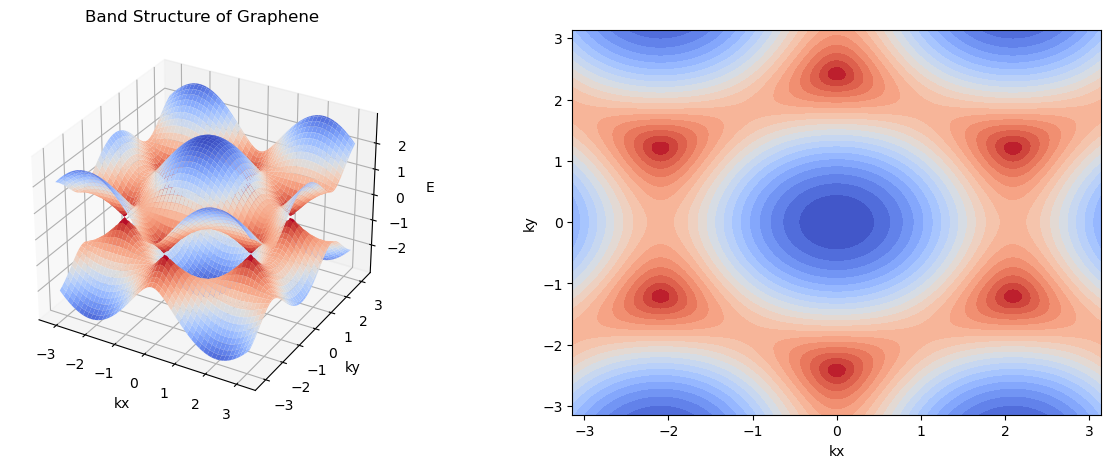

In [4]:
plot_band_structure(energy,1,1)

## Dirac Points

The two bands touches each other at some special points in momentum space, known as the Dirac points. Two independent such points are $K = \frac{2\pi}{3\sqrt{3}a}(\sqrt{3},-1)$ and $K' = \frac{2\pi}{3\sqrt{3}a}(\sqrt{3},1)$. The energy dispersion near those points are shown below.

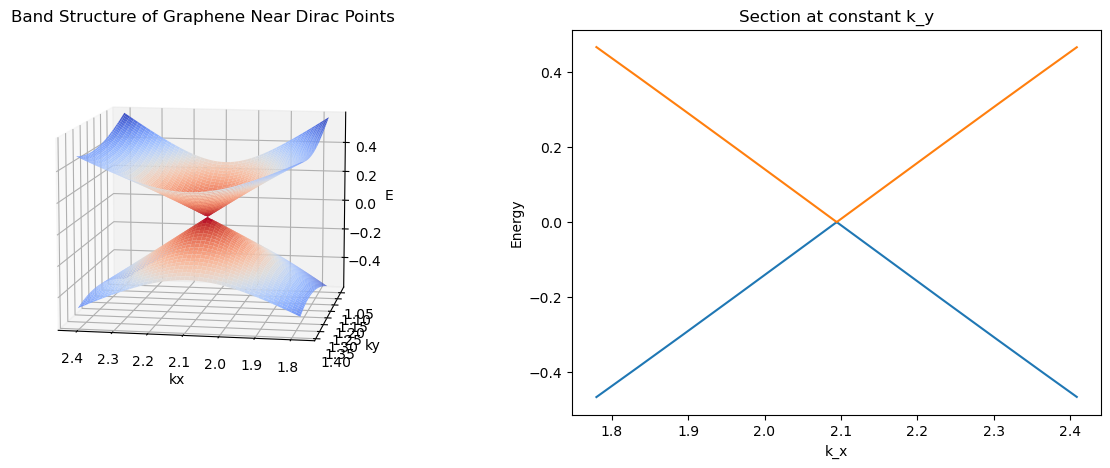

In [24]:
def band_Dirac_points(energy,a,t):
    delta = 0.15
    kx = np.arange(2*np.pi*(1 - delta)/3*a, 2*np.pi*(1+delta)/3*a,0.001) 
    ky = np.arange(2*np.pi*(1 - delta)/(3*np.sqrt(3)*a), 2*np.pi*(1+delta)/(3*np.sqrt(3)*a),0.01) 
    KX,KY = np.meshgrid(kx,ky)

    En = energy(KX,KY,a,t)

    En_kx = np.vectorize(lambda kx: energy(kx,2*np.pi/(3*np.sqrt(3)*a),1,1))(kx)

    fig = plt.figure(figsize=(15, 5))
    ax1 = fig.add_subplot(121, projection='3d')
    ax2 = fig.add_subplot(122)

    ax1.view_init(elev=10., azim=100)
    ax1.plot_surface(KX,KY,En,cmap=cm.coolwarm)
    ax1.plot_surface(KX,KY,-En, cmap=cm.coolwarm_r)
    ax1.set(title="Band Structure of Graphene Near Dirac Points", xlabel='kx', ylabel='ky', zlabel='E')

    ax2.plot(kx,En_kx)
    ax2.plot(kx,-En_kx)
    ax2.set(title="Section at constant k_y",xlabel="k_x",ylabel="Energy")

    plt.show()

band_Dirac_points(energy,1,1)


### Effect of hopping parameter

In [25]:
def band_t(energy, a, trange):
    delta = 0.1
    kx = np.arange(2*np.pi*(1 - delta)/3*a, 2*np.pi*(1+delta)/3*a, 0.001) 
    ky = np.arange(2*np.pi*(1 - delta)/(3*np.sqrt(3)*a), 2*np.pi*(1+delta)/(3*np.sqrt(3)*a), 0.01) 

    fig = plt.figure(figsize=(5,5))
    ax1 = fig.add_subplot(111)

    for t in trange:
        En_kx = np.vectorize(lambda kx: energy(kx, 2*np.pi/(3*np.sqrt(3)*a), 1, t))(kx)
        color = cm.coolwarm((t - trange[0])/(trange[-1] - trange[0]))
        ax1.plot(kx, En_kx, color=color, label=f"t={t:.2f}")
        ax1.plot(kx, -En_kx, color=color)
        
    ax1.set(title="Dependence on the Hopping parameter",xlabel="k_x", ylabel="Energy")
    ax1.legend()
    plt.show()

Change the value of `trange` below and see how the energy dispersion changes. 

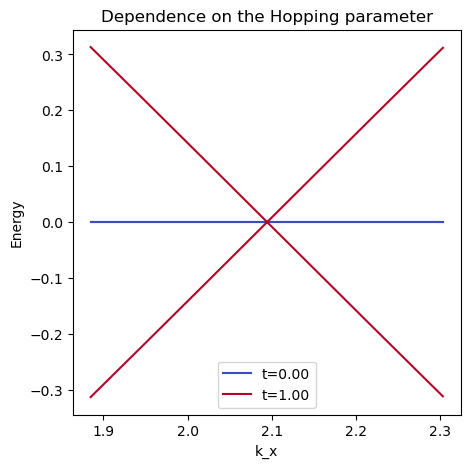

In [26]:
trange = [0,1.0] # range of t
band_t(energy, 1, trange)

## Band Gap in Graphene
Gaps can appear in Graphene for various reason, two major ones are due to the precence of external electric field and strain in the lattice. See this [github repository](https://github.com/Newaiy/ComputationalPhysics-TBmodel_Graphene) for more details on how strain can create a gap in graphene. For the case of electric field, the simplest way one can incorporate into our description as,
$$
    H = -\sum_{\vec k} \psi_k^\dagger \begin{pmatrix}\frac{V}{2} & tS(\vec k) \\ tS^{*}(\vec k) & \frac{V}{2}\end{pmatrix}\psi 
$$
where $V$ is the applied voltage. The energy dispersion is then,
$$
    \epsilon = \frac{V}{2} \pm t|S(\vec k)| 
$$
Clearly this has a gap of $V$ at $K$ and $K'$.

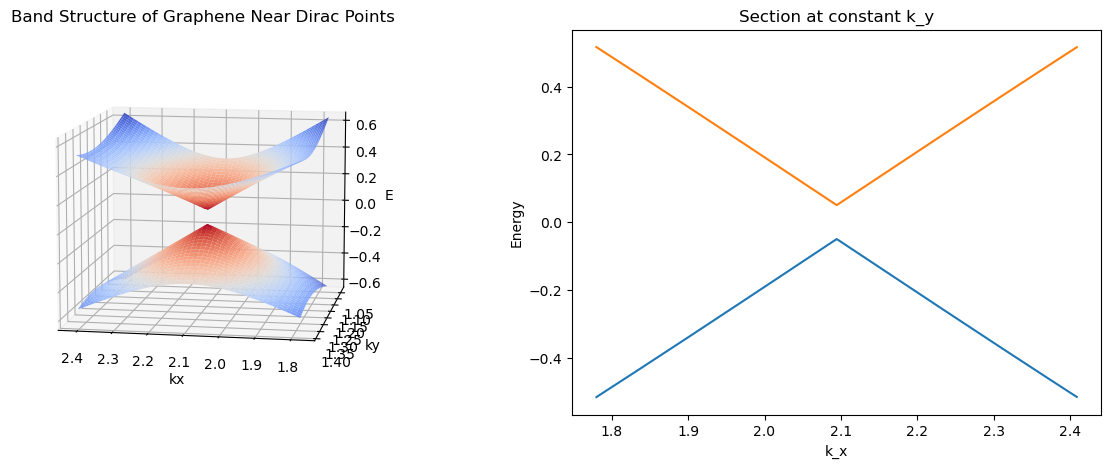

In [27]:
V = 0.1 # You can change the value of V here

def energy_electric_field(kx,ky,a,t):
    return -t*np.sqrt(3+4*np.cos(3*a*kx/2)*np.cos(np.sqrt(3)*a*ky/2) + 2*np.cos(np.sqrt(3)*a*ky)) - V/2

band_Dirac_points(energy_electric_field,1,1)

## Bilayer Graphene
The tight binding model for bilayer graphene is similar to the one for monolayer graphene, except that the hopping parameter is different. The hopping parameter for the nearest neighbours inside one layer is same $t$ as before but now there can be hopping tranverse to the layers. The hopping parameter for the nearest neighbours between the layers is $t_\perp$. The most common bilayer graphene is where the second layer is rotated by $60^0$ with respect to the first layer. In this case only one of the sublattice is exactly on top of each other having a significant hopping while the hopping between the sublattice is small. All of these can be incoporated into our simple description by ,
$$
    H(k) = \begin{pmatrix} 
            0 & tS(k) & t_\perp & 0 \\
            tS^*(k) & 0 & 0 & 0 \\
            t_\perp & 0 & 0 & tS^*(k) \\
            0 & 0 & tS(k) & 0
        \end{pmatrix}
$$
Diagonilsing this matrix we get the energy dispersion,

$$
    \epsilon = \pm \frac{t_\perp}{2} \pm \sqrt{\frac{t_\perp^2}{4} + t^2|S(k)|^2}
$$
Two of these band touch each other while the other two have a gap of $2t_\perp$ which is not relevant for the case of low energy physics.

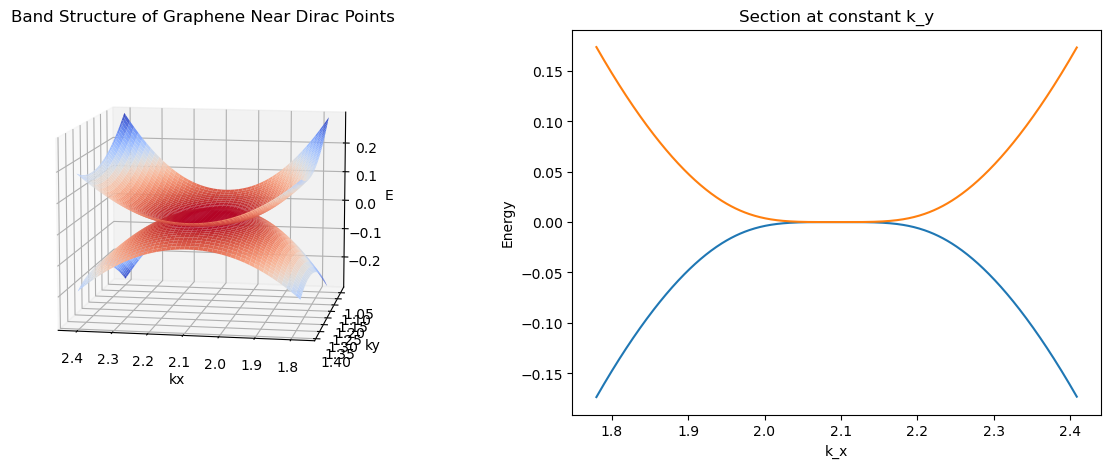

In [28]:
tperp = 0.1 # You can change the value of tperp here
def energy_bilayer(kx,ky,a,t):
    return tperp/2 - np.sqrt(tperp**2/4 + (3+4*np.cos(3*a*kx/2)*np.cos(np.sqrt(3)*a*ky/2) + 2*np.cos(np.sqrt(3)*a*ky))**2)

band_Dirac_points(energy_bilayer,1,1)

Note the two bands near the Dirac points are not linear as before rather they are quadratic. Plot the other two bands where you have a mass gap.

In [33]:
def energy_bilayer2(kx,ky,a,t):
    pass # change this line appropriately

# band_Dirac_points(energy_bilayer2,1,1)

>Can you introduce the hopping between the other sublattice as well?